In [ ]:
%pip install numpy pandas matplotlib scipy

In [272]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [273]:
converters = {
    "Times": lambda x: list(map(lambda y : int(y) / 1000, x.strip().split(" ")))
}

In [274]:
configs = pd.read_csv("configs.csv").set_index('Config')
jsoup = pd.read_csv("jsoup.csv", converters=converters)
guava = pd.read_csv("guava.csv", converters=converters)

# Plots

In [275]:
colors = ['tab:blue', 'tab:brown', 'tab:green', 'tab:purple', 'tab:red', 'tab:olive']

def label_from_config(idx):
    config = configs.loc[idx]
    return f"{config['Memory']} Memory - {config['Cpus']} CPU(s)"

memory_scale_configs = [0,1,2]
compute_scale_configs = [3,4,5]

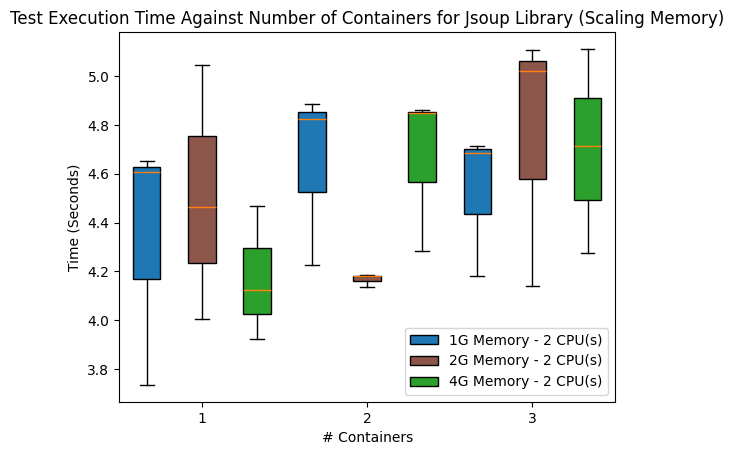

In [276]:
fig, ax = plt.subplots()

ax.set_title("Test Execution Time Against Number of Containers for Jsoup Library (Scaling Memory)")
ax.set_xlabel("# Containers")
ax.set_ylabel("Time (Seconds)")

data = jsoup.loc[jsoup['Config'].isin(memory_scale_configs)].sort_values('NContainers')

for i, (config, ncontainers, times) in enumerate(data.values):
    label = label_from_config(config) if i < 3 else None
    bplot = ax.boxplot(times, patch_artist=True, label=label, positions=[i], boxprops={"facecolor": colors[config]}, widths=[0.5])

ax.set_xticks([1, 4, 7], [1, 2, 3])

ax.legend()
plt.show()

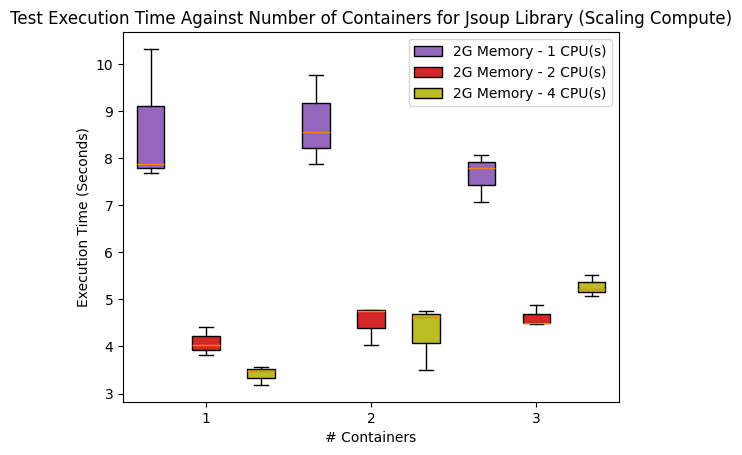

In [277]:
fig, ax = plt.subplots()

ax.set_title("Test Execution Time Against Number of Containers for Jsoup Library (Scaling Compute)")
ax.set_xlabel("# Containers")
ax.set_ylabel("Execution Time (Seconds)")

data = jsoup.loc[jsoup['Config'].isin(compute_scale_configs)].sort_values('NContainers')

for i, (config, ncontainers, times) in enumerate(data.values):
    label = label_from_config(config) if i < 3 else None
    bplot = ax.boxplot(times, patch_artist=True, label=label, positions=[i], boxprops={"facecolor": colors[config]}, widths=[0.5])

ax.set_xticks([1, 4, 7], [1, 2, 3])

ax.legend()
plt.show()

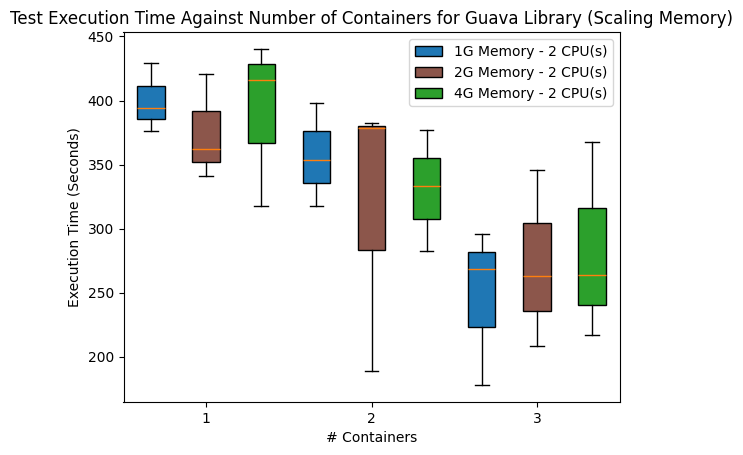

In [278]:
fig, ax = plt.subplots()

ax.set_title("Test Execution Time Against Number of Containers for Guava Library (Scaling Memory)")
ax.set_xlabel("# Containers")
ax.set_ylabel("Execution Time (Seconds)")

data = guava.loc[guava['Config'].isin(memory_scale_configs)].sort_values('NContainers')

for i, (config, ncontainers, times) in enumerate(data.values):
    label = label_from_config(config) if i < 3 else None
    bplot = ax.boxplot(times, patch_artist=True, label=label, positions=[i], boxprops={"facecolor": colors[config]}, widths=[0.5])

ax.set_xticks([1, 4, 7], [1, 2, 3])

ax.legend()
plt.show()

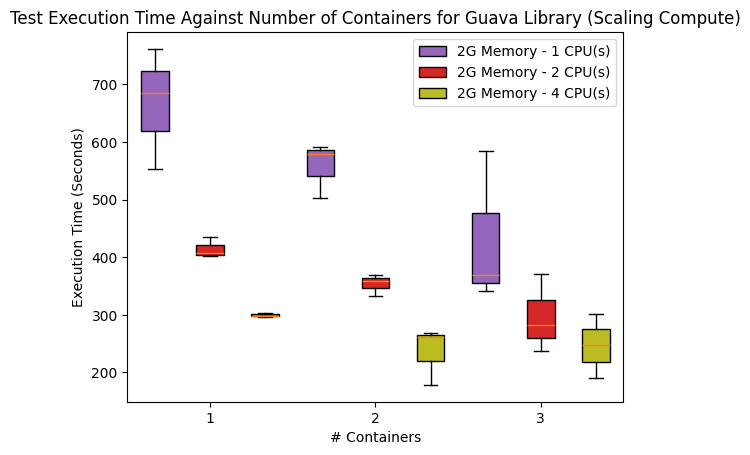

In [279]:
fig, ax = plt.subplots()

ax.set_title("Test Execution Time Against Number of Containers for Guava Library (Scaling Compute)")
ax.set_xlabel("# Containers")
ax.set_ylabel("Execution Time (Seconds)")

data = guava.loc[guava['Config'].isin(compute_scale_configs)].sort_values('NContainers')

for i, (config, ncontainers, times) in enumerate(data.values):
    label = label_from_config(config) if i < 3 else None
    bplot = ax.boxplot(times, patch_artist=True, label=label, positions=[i], boxprops={"facecolor": colors[config]}, widths=[0.5])

ax.set_xticks([1, 4, 7], [1, 2, 3])

ax.legend()
plt.show()

# Statistical Analysis

In [280]:
def two_sample_ttest_containers(a, b, alternative):
    result = stats.ttest_ind(a[2], b[2], alternative=alternative)
    print(f"{a[1]} Containers {alternative} than {b[1]} Container: ", end="")
    if result.pvalue < 0.05:
        print(f"Yes (p={result.pvalue})")
    else:
        print(f"No (p={result.pvalue})")

def two_sample_ttest_configs(a, b, alternative):
    result = stats.ttest_ind(a[2], b[2], alternative=alternative)
    print(f"{label_from_config(a[0])} {alternative} than {label_from_config(b[0])}: ", end="")
    if result.pvalue < 0.05:
        print(f"Yes (p={result.pvalue})")
    else:
        print(f"No (p={result.pvalue})")

## Jsoup

In [281]:
print("Jsoup Scaling Containers")

for config in range(6):
    data = jsoup.loc[jsoup['Config'] == config]
    result = stats.f_oneway(*data['Times'])

    print(f"{label_from_config(config)} - Changing containers changes mean?: ", end="")
    if result.pvalue < 0.05:
        print(f"Yes (p={result.pvalue})")
    else:
        print(f"No (p={result.pvalue})")

Jsoup Scaling Containers
1G Memory - 2 CPU(s) - Changing containers changes mean?: No (p=0.650282966197836)
2G Memory - 2 CPU(s) - Changing containers changes mean?: No (p=0.3165966397969033)
4G Memory - 2 CPU(s) - Changing containers changes mean?: No (p=0.1950787912676775)
2G Memory - 1 CPU(s) - Changing containers changes mean?: No (p=0.43205960444224234)
2G Memory - 2 CPU(s) - Changing containers changes mean?: No (p=0.1885248011664292)
2G Memory - 4 CPU(s) - Changing containers changes mean?: Yes (p=0.0056167549516630754)


In [ ]:
print(f"Test container differences of {label_from_config(5)}")
data = jsoup.loc[jsoup['Config'] == 5].sort_values('NContainers').values

# Adding more containers makes the times worse.
# more cpus = less time per test -> overhead of running containers greater % of execution time
two_sample_ttest_containers(data[1], data[0], 'greater')
two_sample_ttest_containers(data[2], data[0], 'greater')
two_sample_ttest_containers(data[2], data[1], 'greater')

Test container differences of 2G Memory - 4 CPU(s)
2 Containers greater than 1 Container: Yes (p=0.04877712914379824)
3 Containers greater than 1 Container: Yes (p=0.00021021332068231458)
3 Containers greater than 2 Container: Yes (p=0.04022278121300153)


In [283]:
print("Jsoup Scaling Memory")
jsoup_memory_scaling_data = jsoup.loc[jsoup['Config'].isin(memory_scale_configs)]

for i in range(1, 4):
    data = jsoup_memory_scaling_data.loc[(jsoup_memory_scaling_data['NContainers'] == i)]
    result = stats.f_oneway(*data['Times'])

    print(f"{i} container(s) - scaling memory changes mean?: ", end="")
    if result.pvalue < 0.05:
        print(f"Yes (p={result.pvalue})")
    else:
        print(f"No (p={result.pvalue})")

Jsoup Scaling Memory
1 container(s) - scaling memory changes mean?: No (p=0.683810620162654)
2 container(s) - scaling memory changes mean?: No (p=0.12837779682838776)
3 container(s) - scaling memory changes mean?: No (p=0.799392281741261)


In [284]:
print("Jsoup Scaling Compute")

jsoup_compute_scaling_data = jsoup.loc[jsoup['Config'].isin(compute_scale_configs)]

for i in range(1, 4):
    data = jsoup_compute_scaling_data.loc[jsoup_compute_scaling_data['NContainers'] == i]
    result = stats.f_oneway(*data['Times'])

    print(f"{i} container(s) - scaling compute changes mean?: ", end="")
    if result.pvalue < 0.05:
        print(f"Yes (p={result.pvalue})")
    else:
        print(f"No (p={result.pvalue})")

Jsoup Scaling Compute
1 container(s) - scaling compute changes mean?: Yes (p=0.0006448056637402499)
2 container(s) - scaling compute changes mean?: Yes (p=0.0004793371869019404)
3 container(s) - scaling compute changes mean?: Yes (p=8.829955633341443e-05)


In [ ]:
for i in range(1, 4):
    print(f"{i} Container(s)")
    data  = jsoup_compute_scaling_data.loc[jsoup_compute_scaling_data['NContainers'] == i].sort_values('Config').values

    two_sample_ttest_configs(data[1], data[0], 'less')
    two_sample_ttest_configs(data[2], data[0], 'less')
    two_sample_ttest_configs(data[2], data[1], 'less')
    print()

# more cpus = less time per tests.
# no improvement from 2 CPUs to 4 CPUs with >= 2 containers. probably because tests are executing fast enough and more resources don't give that much improvement.

1 Container(s)
2G Memory - 2 CPU(s) less than 2G Memory - 1 CPU(s): Yes (p=0.0031508992625642446)
2G Memory - 4 CPU(s) less than 2G Memory - 1 CPU(s): Yes (p=0.0018269612733385935)
2G Memory - 4 CPU(s) less than 2G Memory - 2 CPU(s): Yes (p=0.015110153793280222)

2 Container(s)
2G Memory - 2 CPU(s) less than 2G Memory - 1 CPU(s): Yes (p=0.0011592009837298836)
2G Memory - 4 CPU(s) less than 2G Memory - 1 CPU(s): Yes (p=0.0014645883025147142)
2G Memory - 4 CPU(s) less than 2G Memory - 2 CPU(s): No (p=0.32683621013520586)

3 Container(s)
2G Memory - 2 CPU(s) less than 2G Memory - 1 CPU(s): Yes (p=0.00034731232462515554)
2G Memory - 4 CPU(s) less than 2G Memory - 1 CPU(s): Yes (p=0.0008670263810397394)
2G Memory - 4 CPU(s) less than 2G Memory - 2 CPU(s): No (p=0.9886046857084158)



## Guava

In [286]:
print("Guava Scaling Containers")

for config in range(6):
    data = guava.loc[guava['Config'] == config]
    result = stats.f_oneway(*data['Times'])

    print(f"{label_from_config(config)} - Changing containers changes mean?: ", end="")
    if result.pvalue < 0.05:
        print(f"Yes (p={result.pvalue})")
    else:
        print(f"No (p={result.pvalue})")

Guava Scaling Containers
1G Memory - 2 CPU(s) - Changing containers changes mean?: Yes (p=0.015388729674607722)
2G Memory - 2 CPU(s) - Changing containers changes mean?: No (p=0.346327802809597)
4G Memory - 2 CPU(s) - Changing containers changes mean?: No (p=0.19772672644959047)
2G Memory - 1 CPU(s) - Changing containers changes mean?: No (p=0.07811002922159663)
2G Memory - 2 CPU(s) - Changing containers changes mean?: Yes (p=0.03722940081416049)
2G Memory - 4 CPU(s) - Changing containers changes mean?: No (p=0.24054702621560803)


In [ ]:
print(f"Test container differences for {label_from_config(0)}")
data = guava.loc[guava['Config'] == 0].sort_values('NContainers').values

two_sample_ttest_containers(data[1], data[0], 'less')
two_sample_ttest_containers(data[2], data[0], 'less')
two_sample_ttest_containers(data[2], data[1], 'less')

# Having 3 containers seems to improve test time. Probably related to having less tests for the same amount of memory (less gc pauses).

Test container differences for 1G Memory - 2 CPU(s)
2 Containers less than 1 Container: No (p=0.09697932587753605)
3 Containers less than 1 Container: Yes (p=0.008535652566407231)
3 Containers less than 2 Container: Yes (p=0.031122740935790844)


In [ ]:
print(f"Test container differences of {label_from_config(4)}")
data = guava.loc[guava['Config'] == 4].values

two_sample_ttest_containers(data[1], data[0], 'less')
two_sample_ttest_containers(data[2], data[0], 'less')
two_sample_ttest_containers(data[2], data[1], 'less')

# Having 2 containers seems to improve test time. 3 not significantly better than 2. Probably the sweet spot between having too little resources and too many.

Test container differences of 2G Memory - 2 CPU(s)
2 Containers less than 1 Container: Yes (p=0.007464193714736396)
3 Containers less than 1 Container: Yes (p=0.021537484454958455)
3 Containers less than 2 Container: No (p=0.11575299737471838)


In [289]:
print("Guava Scaling Memory")
guava_memory_scaling_data = guava[guava['Config'].isin(memory_scale_configs)]

for i in range(1, 4):
    data = guava_memory_scaling_data.loc[(guava_memory_scaling_data['NContainers'] == i)]
    result = stats.f_oneway(*data['Times'])

    print(f"{i} container(s) - scaling memory changes mean?: ", end="")
    if result.pvalue < 0.05:
        print(f"Yes (p={result.pvalue})")
    else:
        print(f"No (p={result.pvalue})")

Guava Scaling Memory
1 container(s) - scaling memory changes mean?: No (p=0.806092968925044)
2 container(s) - scaling memory changes mean?: No (p=0.8027333829323475)
3 container(s) - scaling memory changes mean?: No (p=0.8179940937488993)


In [290]:
print("Guava Scaling Compute")
guava_compute_scaling_data = guava.loc[guava['Config'].isin(compute_scale_configs)]

for i in range(1, 4):
    data = guava_compute_scaling_data.loc[(guava_compute_scaling_data['NContainers'] == i)]
    result = stats.f_oneway(*data['Times'])

    print(f"{i} container(s) - scaling compute changes mean?: ", end="")
    if result.pvalue < 0.05:
        print(f"Yes (p={result.pvalue})")
    else:
        print(f"No (p={result.pvalue})")

Guava Scaling Compute
1 container(s) - scaling compute changes mean?: Yes (p=0.000949544401137189)
2 container(s) - scaling compute changes mean?: Yes (p=0.0002255570903450411)
3 container(s) - scaling compute changes mean?: No (p=0.11016784936384207)


In [ ]:
for i in range(1, 4):
    print(f"{i} Container(s)")
    data = guava_compute_scaling_data.loc[guava_compute_scaling_data['NContainers'] == i].sort_values('Config').values

    two_sample_ttest_configs(data[1], data[0], 'less')
    two_sample_ttest_configs(data[2], data[0], 'less')
    two_sample_ttest_configs(data[2], data[1], 'less')
    print()

# Up until 3 containers, more compute reduces test execution time.
# At 3 containers, 4 CPUs is better than 1 CPU but not significantly better than 2 CPUs. Probably because test load is more spread out so vertical scaling has dimishing returns.

1 Container(s)
2G Memory - 2 CPU(s) less than 2G Memory - 1 CPU(s): Yes (p=0.0076393782941940455)
2G Memory - 4 CPU(s) less than 2G Memory - 1 CPU(s): Yes (p=0.0019351837946597688)
2G Memory - 4 CPU(s) less than 2G Memory - 2 CPU(s): Yes (p=0.0001939820753056476)

2 Container(s)
2G Memory - 2 CPU(s) less than 2G Memory - 1 CPU(s): Yes (p=0.0011500344140022891)
2G Memory - 4 CPU(s) less than 2G Memory - 1 CPU(s): Yes (p=0.000648931870239899)
2G Memory - 4 CPU(s) less than 2G Memory - 2 CPU(s): Yes (p=0.009648129506918747)

3 Container(s)
2G Memory - 2 CPU(s) less than 2G Memory - 1 CPU(s): No (p=0.09575648052661472)
2G Memory - 4 CPU(s) less than 2G Memory - 1 CPU(s): Yes (p=0.04495260780462803)
2G Memory - 4 CPU(s) less than 2G Memory - 2 CPU(s): No (p=0.18981762250141956)

